In [1]:
import sys
import imp
sys.path.insert(0, '../src')

In [26]:
import scipy.io
import numpy as np
import denoise.algorithms.network_enhancement as ne
import denoise.algorithms.dsd.dse_computations as dse
imp.reload(ne)
imp.reload(dse)

butterfly_mat = scipy.io.loadmat("../data/ne_files/Raw_butterfly_network.mat")
butterfly_adj    = butterfly_mat["W_butterfly0"]
butterfly_labels = butterfly_mat["labels"][0]

# TODO: Should do link removal instead of denoising
def compute_norm_dsd_graph(A):
    n, _ = A.shape
    D = A @ np.ones((n, 1))
    D = np.diag(D.flatten())
    X = dse.compute_X_normalized(butterfly_adj, D, -1)
    return X

butterfly_adj_ne  = ne.network_enhancement(butterfly_adj)
butterfly_adj_dsd = compute_norm_dsd_graph(butterfly_adj)

Text(0, 0.5, 'Identification Accuracy')

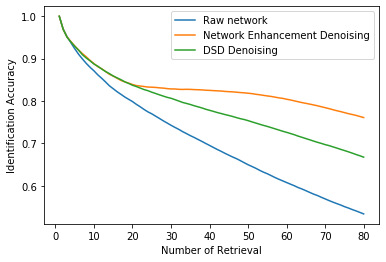

In [30]:
import numpy as np
import matplotlib.pyplot as plt

"""
Calculates the accuracy of retrieving the k most similar images
for all images.
"""
def retrieval_accuracy(W, labels, k):
    num_images = W.shape[0]
    W = -1 * (W.copy() + np.identity(num_images))
    closest_images = np.argsort(W)
    
    correctly_retrieved = np.zeros(num_images)
    for i in range(num_images):
        correct_label = labels[i]
        hits = [labels[closest_images[i, j]] == correct_label for j in range(0, k)]
        correctly_retrieved[i] = sum([1 if hit else 0 for hit in hits])
    
    return correctly_retrieved / float(k)

MAX_RETRIEVALS = 80
retrieval_accuracies = np.zeros(MAX_RETRIEVALS)
retrieval_accuracies_ne = np.zeros(MAX_RETRIEVALS)
retrieval_accuracies_dsd = np.zeros(MAX_RETRIEVALS)
for i in range(1, MAX_RETRIEVALS + 1):
    retrieval_accuracies[i - 1] = np.mean(retrieval_accuracy(butterfly_adj, butterfly_labels, i))
    retrieval_accuracies_ne[i - 1] = np.mean(retrieval_accuracy(butterfly_adj_ne, butterfly_labels, i))
    retrieval_accuracies_dsd[i - 1] = np.mean(retrieval_accuracy(butterfly_adj_dsd, butterfly_labels, i))

num_retrievals = np.array(range(1, MAX_RETRIEVALS + 1))

fig, ax = plt.subplots()
ax.plot(num_retrievals, retrieval_accuracies, label='Raw network')
ax.plot(num_retrievals, retrieval_accuracies_ne, label='Network Enhancement Denoising')
ax.plot(num_retrievals, retrieval_accuracies_dsd, label='DSD Denoising')
ax.legend()
ax.set_xlabel('Number of Retrieval')
ax.set_ylabel('Identification Accuracy')

In [10]:
def mean_accuracy(W, labels):
    num_images = W.shape[0]
    W = -1 * (W.copy() + np.identity(num_images))
    closest_images = np.argsort(W)
    
    _, label_counts = np.unique(labels, return_counts=True)
    retrieval_accuracies = np.zeros(num_images)
    for i in range(num_images):
        correct_label = labels[i]
        k = label_counts[correct_label - 1]
        hits = [labels[closest_images[i, j]] == correct_label for j in range(1, k)]
        retrieval_accuracies[i] = sum([1 if hit else 0 for hit in hits])
        retrieval_accuracies[i] = float(retrieval_accuracies[i]) / float(k - 1)
    
    return np.mean(retrieval_accuracies)

accuracy_std = mean_accuracy(butterfly_adj, butterfly_labels)
accuracy_ne  = mean_accuracy(butterfly_adj_denoised, butterfly_labels)

print(f"The accuracy on the raw network is {accuracy_std}.")
print(f"The accuracy on the network enhancement denoised network is {accuracy_ne}.")

The accuracy on the raw network is 0.5165260408938313.
The accuracy on the network enhancement denoised network is 0.7585226885645802.


In [12]:
import denoise.algorithms.network_enhancement as ne
imp.reload(ne)

W = np.array([[0, 1, 4, 3, 2],
              [1, 0, 2, 3, 1],
              [4, 2, 0, 1, 3],
              [3, 3, 1, 0, 4],
              [2, 1, 3, 4, 0]])

KNN = ne.nearest_neighbors_graph(W, 2)
P   = ne.transition_matrix(W)

print(f"Nearest Neighbors Graph:\n{KNN}")
print()
print(f"Transition Matrix:\n{P}")

Nearest Neighbors Graph:
[[0.  0.  4.  3.  0. ]
 [0.  0.  1.  1.5 0. ]
 [4.  1.  0.  0.  3. ]
 [3.  1.5 0.  0.  4. ]
 [0.  0.  3.  4.  0. ]]

Transition Matrix:
[[0.         0.1        0.4        0.3        0.2       ]
 [0.14285714 0.         0.28571429 0.42857143 0.14285714]
 [0.4        0.2        0.         0.1        0.3       ]
 [0.27272727 0.27272727 0.09090909 0.         0.36363636]
 [0.2        0.1        0.3        0.4        0.        ]]


In [14]:
import denoise.algorithms.dsd as dsd

dsd.dse_computations.compute_X_normalized

AttributeError: module 'denoise.algorithms.dsd' has no attribute 'dse_computations'